In [1]:
import pandas as pd

In [51]:
df = pd.read_csv("Practice_File.csv")

In [52]:
df = df[['SalePrice', 'LotArea']]
df.describe()

,SalePrice,LotArea
count,1460.000000,1460.000000
mean,180921.195890,10516.828082
std,79442.502883,9981.264932
min,34900.000000,1300.000000
25%,129975.000000,7553.500000
50%,163000.000000,9478.500000
75%,214000.000000,11601.500000
max,755000.000000,215245.000000


In [25]:
df.shape

(1460, 2)

### Quantile-based Flooring and Capping

In [26]:
print(df['SalePrice'].quantile(0.01)) # Floor
print(df['SalePrice'].quantile(0.99)) # Cap

61815.97
442567.01000000053


In [27]:
import numpy as np
floor = df['SalePrice'].quantile(0.01)
cap = df['SalePrice'].quantile(0.99)
df['QFC_SalePrice'] = np.where(df['SalePrice'] < floor, floor, df['SalePrice'])
df['QFC_SalePrice'] = np.where(df['SalePrice'] > cap, cap, df['SalePrice'])

In [29]:
df.sample(n=10)

,SalePrice,LotArea,QFC_SalePrice
505,124500,7596,124500.0
534,178000,9056,178000.0
647,155000,10452,155000.0
567,214000,10171,214000.0
1123,118000,9405,118000.0
1177,115000,3950,115000.0
480,326000,16033,326000.0
878,148000,11782,148000.0
57,196500,11645,196500.0
273,139000,9600,139000.0


{'whiskers': [<matplotlib.lines.Line2D at 0x16a17e370>,
 'caps': [<matplotlib.lines.Line2D at 0x16a17e8b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16a17e0d0>],
 'medians': [<matplotlib.lines.Line2D at 0x16a17edf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x16a1860d0>],
 'means': []}

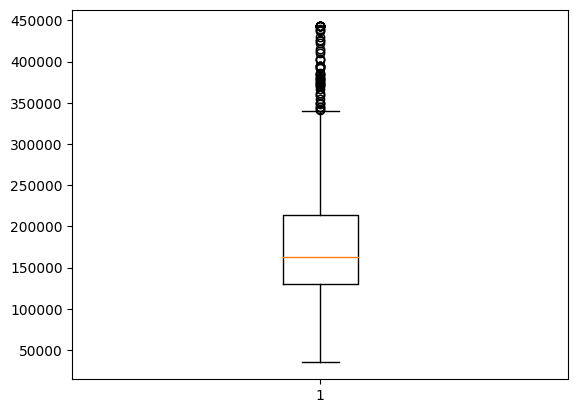

In [33]:
import matplotlib.pyplot as plt
plt.boxplot(df['QFC_SalePrice'])

In [34]:
import numpy as np
floor = df['SalePrice'].quantile(0.10)
cap = df['SalePrice'].quantile(0.90)
df['QFC_10/90_SalePrice'] = np.where(df['QFC_SalePrice'] < floor, floor, df['QFC_SalePrice'])
df['QFC_10/90_SalePrice'] = np.where(df['QFC_SalePrice'] > cap, cap, df['QFC_SalePrice'])

{'whiskers': [<matplotlib.lines.Line2D at 0x16a1e2310>,
 'caps': [<matplotlib.lines.Line2D at 0x16a1e2850>,
 'boxes': [<matplotlib.lines.Line2D at 0x16a1e2070>],
 'medians': [<matplotlib.lines.Line2D at 0x16a1e2d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x16a1f0070>],
 'means': []}

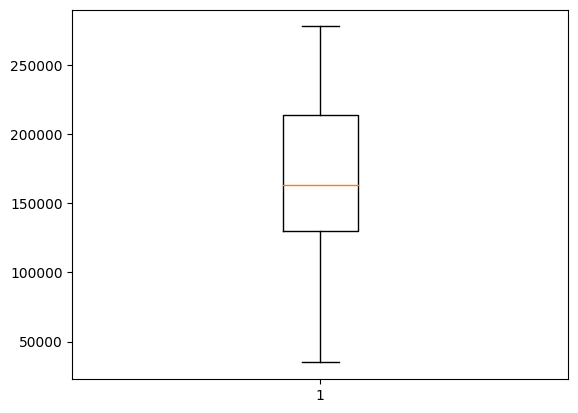

In [35]:
import matplotlib.pyplot as plt
plt.boxplot(df['QFC_10/90_SalePrice'])

### Trimming

In [46]:
lot_area_Q1 = df['LotArea'].quantile(0.25)
lot_area_Q3 = df['LotArea'].quantile(0.75)
lot_area_IQR = lot_area_Q3 - lot_area_Q1
boundary = [lot_area_Q3 + 1.5 * lot_area_IQR, lot_area_Q1 - 1.5 * lot_area_IQR]

In [47]:
index = df[(df['LotArea'] >= boundary[0]) | (df['LotArea'] <= boundary[1])].index
index

Int64Index([  53,   66,  113,  120,  159,  171,  185,  197,  249,  260,  271,
             277,  304,  313,  335,  349,  364,  384,  411,  417,  422,  451,
             457,  523,  529,  558,  563,  588,  661,  664,  666,  691,  692,
             706,  726,  769,  807,  828,  848,  854,  876,  934,  939,  943,
             956, 1010, 1039, 1048, 1057, 1061, 1107, 1151, 1169, 1173, 1184,
            1190, 1230, 1260, 1270, 1277, 1287, 1298, 1346, 1383, 1396, 1409,
            1423, 1430, 1446],
           dtype='int64')

In [48]:
df.shape

(1460, 2)

In [49]:
df.drop(index, inplace=True)

In [50]:
df.shape

(1391, 2)

### Log Transformation

(array([ 16.,  74., 184., 345., 252., 199., 125.,  85.,  61.,  38.,  27.,
         15.,  14.,   8.,   6.,   2.,   1.,   1.,   2.,   1.,   2.,   0.,
          0.,   0.,   2.]),
 array([ 34900.,  63704.,  92508., 121312., 150116., 178920., 207724.,
        236528., 265332., 294136., 322940., 351744., 380548., 409352.,
        438156., 466960., 495764., 524568., 553372., 582176., 610980.,
        639784., 668588., 697392., 726196., 755000.]),
 <BarContainer object of 25 artists>)

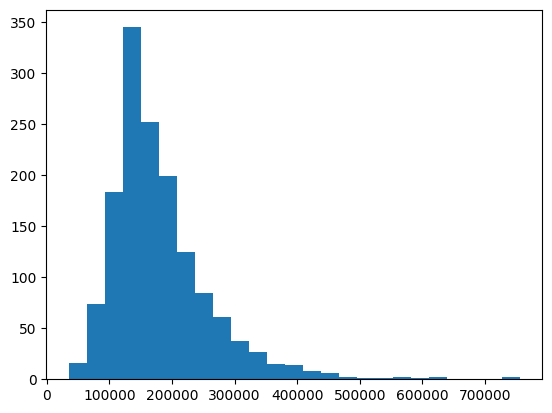

In [53]:
plt.hist(df['SalePrice'], bins=25)

In [54]:
print(df['SalePrice'].skew())

1.8828757597682129


In [55]:
df['Log_SalePrice'] = df['SalePrice'].map(lambda i: np.log(i) if i > 0 else 0)

In [57]:
print(df['Log_SalePrice'].skew())

0.12133506220520406


(array([  4.,   1.,   0.,   5.,   7.,   6.,  26.,  45.,  47., 114., 165.,
        215., 172., 199., 119., 109.,  88.,  52.,  35.,  26.,  12.,   5.,
          4.,   2.,   2.]),
 array([10.46024211, 10.58321134, 10.70618058, 10.82914982, 10.95211906,
        11.07508829, 11.19805753, 11.32102677, 11.443996  , 11.56696524,
        11.68993448, 11.81290371, 11.93587295, 12.05884219, 12.18181142,
        12.30478066, 12.4277499 , 12.55071913, 12.67368837, 12.79665761,
        12.91962684, 13.04259608, 13.16556532, 13.28853455, 13.41150379,
        13.53447303]),
 <BarContainer object of 25 artists>)

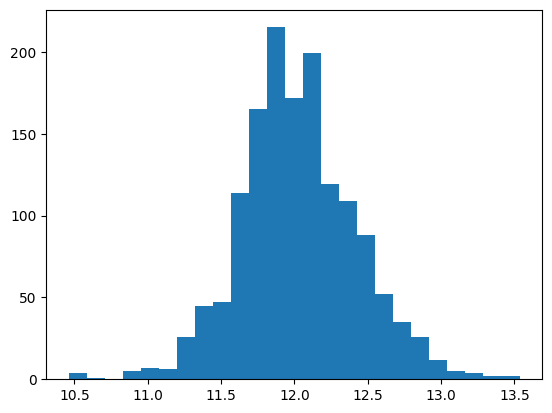

In [58]:
plt.hist(df['Log_SalePrice'], bins=25)

{'whiskers': [<matplotlib.lines.Line2D at 0x16a112c70>,
 'caps': [<matplotlib.lines.Line2D at 0x169d5bd90>,
 'boxes': [<matplotlib.lines.Line2D at 0x16a112af0>],
 'medians': [<matplotlib.lines.Line2D at 0x16a20e400>],
 'fliers': [<matplotlib.lines.Line2D at 0x16a2c6ee0>],
 'means': []}

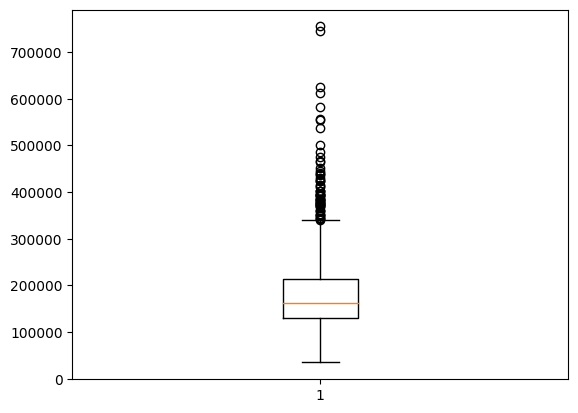

In [59]:
plt.boxplot(df['SalePrice'])

{'whiskers': [<matplotlib.lines.Line2D at 0x16a0c0cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x16a13f250>,
 'boxes': [<matplotlib.lines.Line2D at 0x16a0c0a30>],
 'medians': [<matplotlib.lines.Line2D at 0x16a13f790>],
 'fliers': [<matplotlib.lines.Line2D at 0x16a13fa30>],
 'means': []}

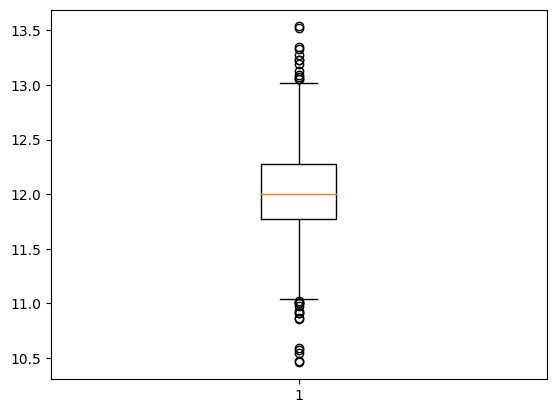

In [60]:
plt.boxplot(df['Log_SalePrice'])

### Discretizer

In [61]:
from sklearn.preprocessing import Binarizer

In [69]:
age = np.array([[6], [12], [18], [36], [65]])

In [70]:
binarzer = Binarizer(threshold=18)

In [71]:
binarzer.fit_transform(age)

array([[0],
       [0],
       [0],
       [1],
       [1]])

In [74]:
age = np.array([[6], [12], [20], [36], [65], [30], [64]])
np.digitize(age, bins=[20, 30, 64]) # multiple threshold value

array([[0],
       [0],
       [1],
       [2],
       [3],
       [2],
       [3]])

In [75]:
data_dict = {
    'age': [10, 20, 30, 35, 40, 50, 55, 59, 60]
}
df = pd.DataFrame(data_dict)
df

,age
0,10
1,20
2,30
3,35
4,40
5,50
6,55
7,59
8,60


In [76]:
np.digitize(df['age'], bins=[20, 30, 40])

array([0, 1, 2, 2, 3, 3, 3, 3, 3])

In [77]:
df['age_digitize'] = np.digitize(df['age'], bins=[20, 30, 40])
df

,age,age_digitize
0,10,0
1,20,1
2,30,2
3,35,2
4,40,3
5,50,3
6,55,3
7,59,3
8,60,3


In [78]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [79]:
clusterer = KMeans(3, random_state=0)

In [80]:
features, _ = make_blobs(
    n_samples=50,
    n_features=2,
    centers=3,
    random_state=1
)

In [81]:
clusterer.fit(features)

KMeans(n_clusters=3, random_state=0)

In [82]:
dataframe = pd.DataFrame(features, columns=['feature_1', 'feature_2'])

In [83]:
dataframe['group'] = clusterer.predict(features)

In [84]:
dataframe.head(5)

,feature_1,feature_2,group
0,-9.877554,-3.336145,0
1,-7.287210,-8.353986,2
2,-6.943061,-7.023744,2
3,-7.440167,-8.791959,2
4,-6.641388,-8.075888,2


In [99]:
dataframe['group'].value_counts()

2    17
1    17
0    16
Name: group, dtype: int64

In [105]:
centers = clusterer.cluster_centers_

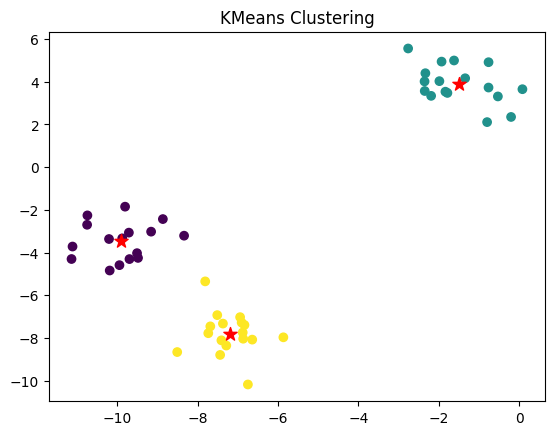

In [107]:
plt.scatter(features[:, 0], features[:, 1], c=clusterer.labels_)
plt.scatter(centers[:, 0], centers[:, 1], marker='*', s=100, c='r')
plt.title('KMeans Clustering')
plt.show()

### Predicting missing values

In [108]:
from sklearn.impute import KNNImputer

In [109]:
X = [[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]]

In [110]:
imputer = KNNImputer(n_neighbors=2)

In [111]:
imputer.fit_transform(X)

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

### Simple Imputer

In [112]:
from sklearn.impute import SimpleImputer

In [113]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

In [114]:
imp_mean.fit([[7, 2, 3], [4, np.nan, 6], [10, 5, 9]])

SimpleImputer()

In [115]:
X = [[np.nan, 2, 3], [4, np.nan, 6], [10, np.nan, 9]]

In [117]:
print(imp_mean.transform(X))

[[ 7.   2.   3. ]
 [ 4.   3.5  6. ]
 [10.   3.5  9. ]]


### Encoding

In [118]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit_transform(['yes', 'no', 'no', 'yes'])

array([[1],
       [0],
       [0],
       [1]])

In [119]:
lb.classes_

array(['no', 'yes'], dtype='<U3')

In [120]:
df = pd.DataFrame({'X': ['a', 'b', 'a'], 'y': ['B', 'A', 'C'], 'Z': [1, 2, 3]})

In [121]:
df

,X,y,Z
0,a,B,1
1,b,A,2
2,a,C,3


In [122]:
pd.get_dummies(df, prefix=['colX', 'ColY'])

,Z,colX_a,colX_b,ColY_A,ColY_B,ColY_C
0,1,1,0,0,1,0
1,2,0,1,1,0,0
2,3,1,0,0,0,1


In [123]:
pd.get_dummies(df)

,Z,X_a,X_b,y_A,y_B,y_C
0,1,1,0,0,1,0
1,2,0,1,1,0,0
2,3,1,0,0,0,1
